## PYTORCH - Learning Basics


Working with Data
Creating the model
Optimizing the model parameters
Saving the model

Pytorch has two primitive to work with data 1. torch.utils.data.DataLoader
                                            2. torch.utils.data.Dataset

Dataset stores the samples and corresponding labels, 
DataLoader wraps an iterable around the dataset


In [36]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [37]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [38]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


Model is created in class which inherits nn.Module and layers are defined in the __init__ function and data pass in the forward function

In [39]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [40]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [41]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [42]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [43]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.302980  [    0/60000]
loss: 2.300723  [ 6400/60000]
loss: 2.281601  [12800/60000]
loss: 2.273447  [19200/60000]
loss: 2.265865  [25600/60000]
loss: 2.231942  [32000/60000]
loss: 2.236166  [38400/60000]
loss: 2.206103  [44800/60000]
loss: 2.196313  [51200/60000]
loss: 2.178924  [57600/60000]
Test Error: 
 Accuracy: 50.1%, Avg loss: 2.174697 

Epoch 2
-------------------------------
loss: 2.176352  [    0/60000]
loss: 2.172991  [ 6400/60000]
loss: 2.120133  [12800/60000]
loss: 2.132396  [19200/60000]
loss: 2.094589  [25600/60000]
loss: 2.035585  [32000/60000]
loss: 2.050665  [38400/60000]
loss: 1.978788  [44800/60000]
loss: 1.974434  [51200/60000]
loss: 1.922422  [57600/60000]
Test Error: 
 Accuracy: 60.7%, Avg loss: 1.915395 

Epoch 3
-------------------------------
loss: 1.933304  [    0/60000]
loss: 1.914935  [ 6400/60000]
loss: 1.797405  [12800/60000]
loss: 1.841314  [19200/60000]
loss: 1.747502  [25600/60000]
loss: 1.686523  [32000/600

In [44]:
torch.save(model.state_dict(),"model.pth")

In [45]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [46]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


## PYTORCH - Tensors

Tensors are similar data structutes like numpy arrays and matrics

In [47]:
import torch
import numpy as np

In [48]:
data = [[1,2],[3,4]]
x_data = torch.tensor(data)

In [49]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [50]:
x_ones = torch.ones_like(x_data)
x_rand = torch.rand_like(x_data,dtype=torch.float)

In [51]:
x_ones

tensor([[1, 1],
        [1, 1]])

In [52]:
x_rand

tensor([[0.3898, 0.9666],
        [0.3869, 0.8889]])

In [53]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

In [54]:
print (rand_tensor)

tensor([[0.3420, 0.1463, 0.5292],
        [0.6784, 0.8180, 0.5919]])


In [55]:
print (ones_tensor)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [56]:
print (zeros_tensor)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [57]:
tensor = torch.rand(3,4)
print (tensor.shape)
print (tensor.dtype)
print (tensor.device)

torch.Size([3, 4])
torch.float32
cpu


Copying Large Tensors across the device can be expensive

In [58]:
tensor = torch.ones(4,4)
print (tensor[0])
print (tensor[:,0])
print (tensor[...,-1])

tensor([1., 1., 1., 1.])
tensor([1., 1., 1., 1.])
tensor([1., 1., 1., 1.])


In [60]:
t1 = torch.cat([tensor,tensor,tensor],dim=1)

In [61]:
print (t1)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])


In [62]:
y1 = tensor@tensor.T

In [70]:
y3 = torch.rand_like(tensor)
y2 = torch.matmul(tensor,tensor.T,out=y3)

In [71]:
tensor.shape

torch.Size([4, 4])

In [72]:
y3.shape

torch.Size([4, 4])

In [65]:
z1 = tensor*tensor

In [67]:
z2 = tensor.mul(tensor)

In [69]:
z3 = torch.rand_like(tensor)
torch.mul(tensor,tensor,out=z3)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [74]:
agg = tensor.sum()

In [75]:
agg.item()

16.0

In [76]:
tensor.add_(5)

tensor([[6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.]])

In [77]:
t = torch.ones(5)

In [78]:
n = t.numpy()

In [79]:
n

array([1., 1., 1., 1., 1.], dtype=float32)

In [80]:
t.add_(1)

tensor([2., 2., 2., 2., 2.])

In [81]:
n = np.ones(5)
t = torch.from_numpy(n)

In [82]:
np.add(n,1,out=n)

array([2., 2., 2., 2., 2.])

## Dataset and Dataloaders

In [83]:
import torch 
from torch.utils.data import Dataset 
from torchvision import datasets
from torchvision.transforms import ToTensor 
import matplotlib.pyplot as plt 

In [84]:
training_data = datasets.FashionMNIST(
    root = "data",
    download = True,
    train = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = "data",
    download = True,
    train = False,
    transform = ToTensor()
)

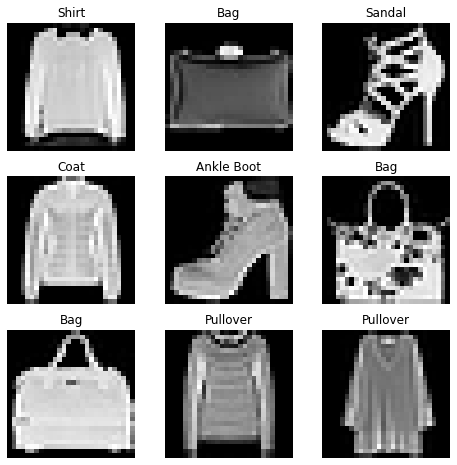

In [89]:
label_mp = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))

cols, rows = 3,3

for i in range(1,cols*rows+1):
  sample_idx = torch.randint(len(training_data),size=(1,)).item()
  img,label = training_data[sample_idx]
  figure.add_subplot(rows,cols,i)
  plt.title(label_mp[label])
  plt.axis("off")
  plt.imshow(img.squeeze(),cmap="gray")
plt.show()

In [90]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


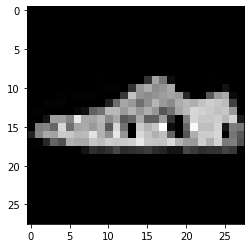

Label: 5


In [91]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")


## Transforms

Transforms are used to modify the datasets so that they can be used for training the models

In [92]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [93]:
'''
Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(dim = 0, index = torch.tensor(y), value=1))

: It is used to transform labels to one hot vector, first we create 10x1 zeros vector and use scatter_ to replace 0 with 1 using index

'''

'\nLambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(dim = 0, index = torch.tensor(y), value=1))\n\n: It is used to transform labels to one hot vector, first we create 10x1 zeros vector and use scatter_ to replace 0 with 1 using index\n\n'